# HR Attrition Analysis

### Import Relevant Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 
import numpy as np
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

### Import Dataset

In [2]:
hr_df = pd.read_csv("hr_analysis.csv")



### Initial Exploration of Dataset

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:


hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2





### Cleaning of Dataset

In [6]:
hr_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:





duplicates = hr_df[hr_df.duplicated()]
duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager








Since there are no missing values or duplicate values the dataset is clean

### Adding columns 
Since BusinessTravel, OverTime and Attrition are objects, in order to include them in our analysis and correlation we map them to binary values 

In [8]:
unique_travel = hr_df['BusinessTravel'].unique()
unique_travel
hr_df['TravelBinary'] = hr_df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

hr_df['OTBinary'] = hr_df['OverTime'].map({'No':0, 'Yes':1})

hr_df['AttritionBinary'] = hr_df['Attrition'].map({'Yes':1, 'No':0})

### Setting the Palette

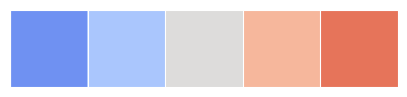

In [9]:
hue_colors = {'Yes': 'lightcoral', 'No': 'skyblue'}
sns.set_palette("coolwarm")
coolwarm_palette = sns.color_palette("coolwarm", 5)
sns.palplot(coolwarm_palette)
plt.show()

### Distribution of Variables 

Distribution of Employment Factors 

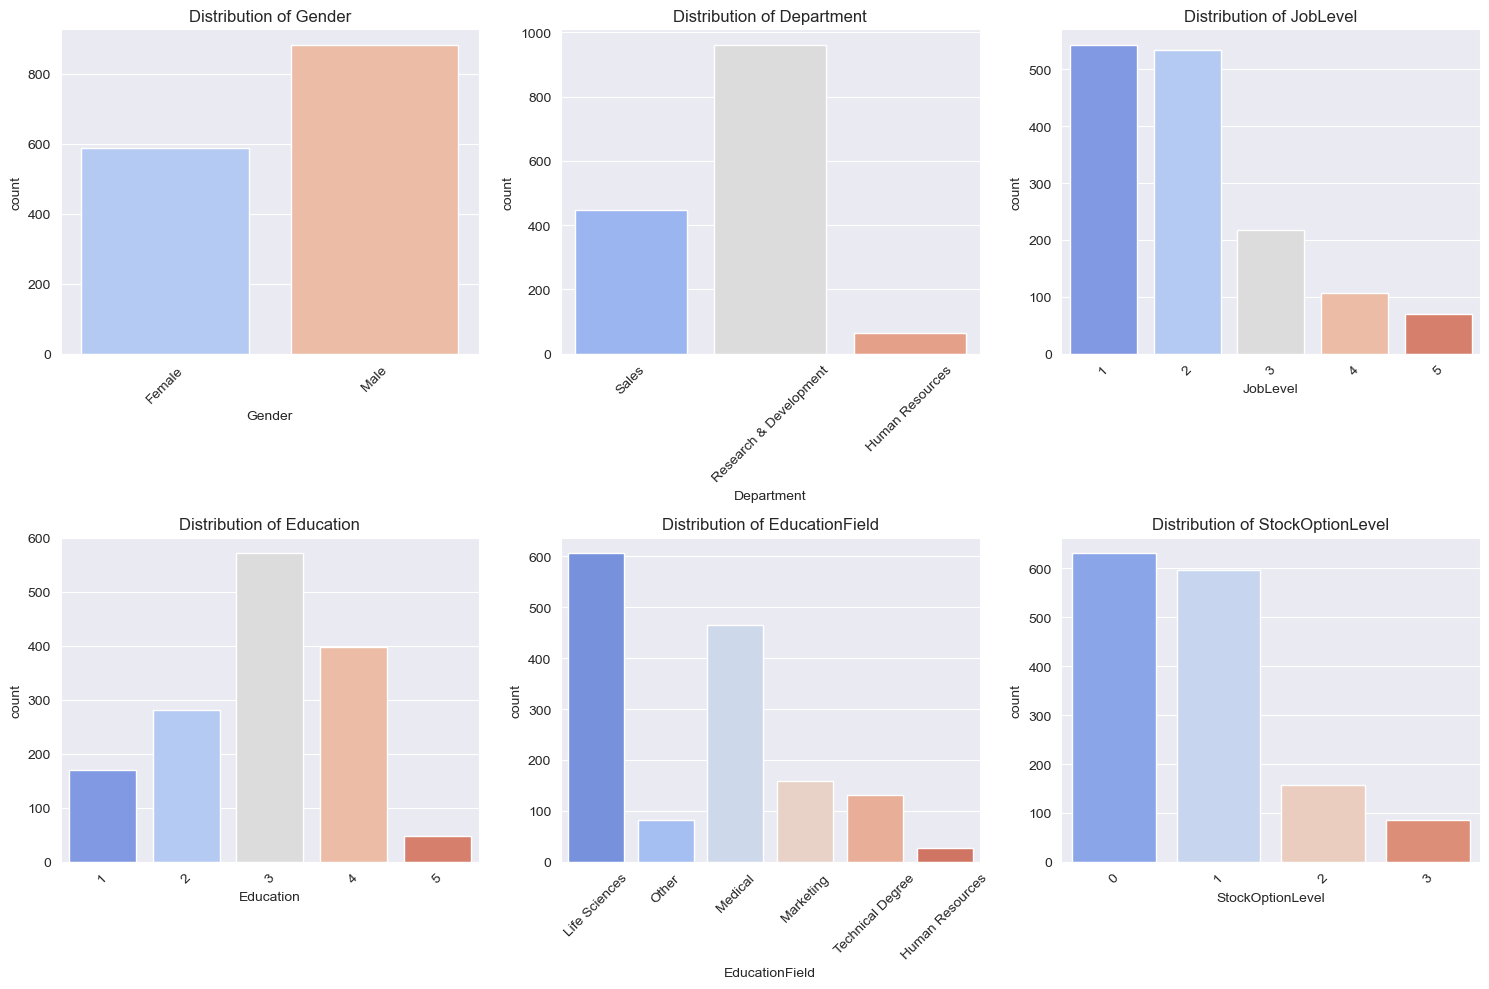

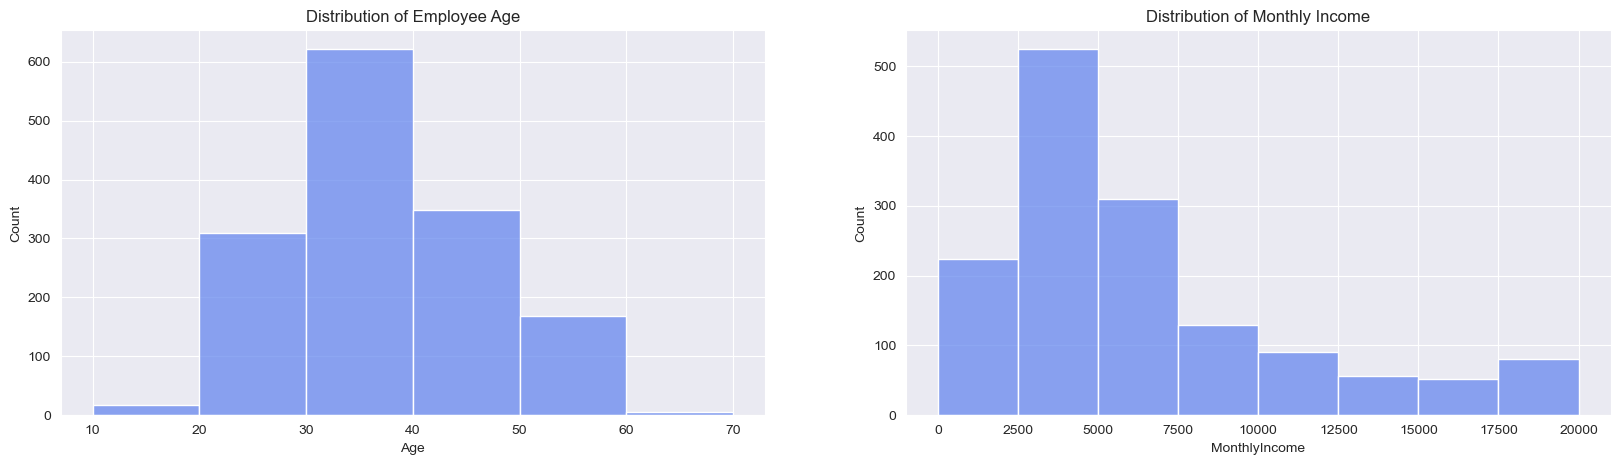

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
job_factors = ['Gender', 'Department', 'JobLevel', 'Education', 'EducationField', 'StockOptionLevel']
for i, factor in enumerate(job_factors):
    sns.countplot(x=factor, data=hr_df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Distribution of {factor}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
sns.set_palette('coolwarm')
sns.histplot(hr_df['Age'], bins=[10,20,30,40,50,60,70], ax=axes[0])
axes[0].set_title('Distribution of Employee Age')
sns.histplot(hr_df['MonthlyIncome'], bins=[0,2500,5000,7500,10000,12500,15000,17500,20000], ax=axes[1])
axes[1].set_title('Distribution of Monthly Income')
plt.show()

Distribution of Longevity/Stability Factors 

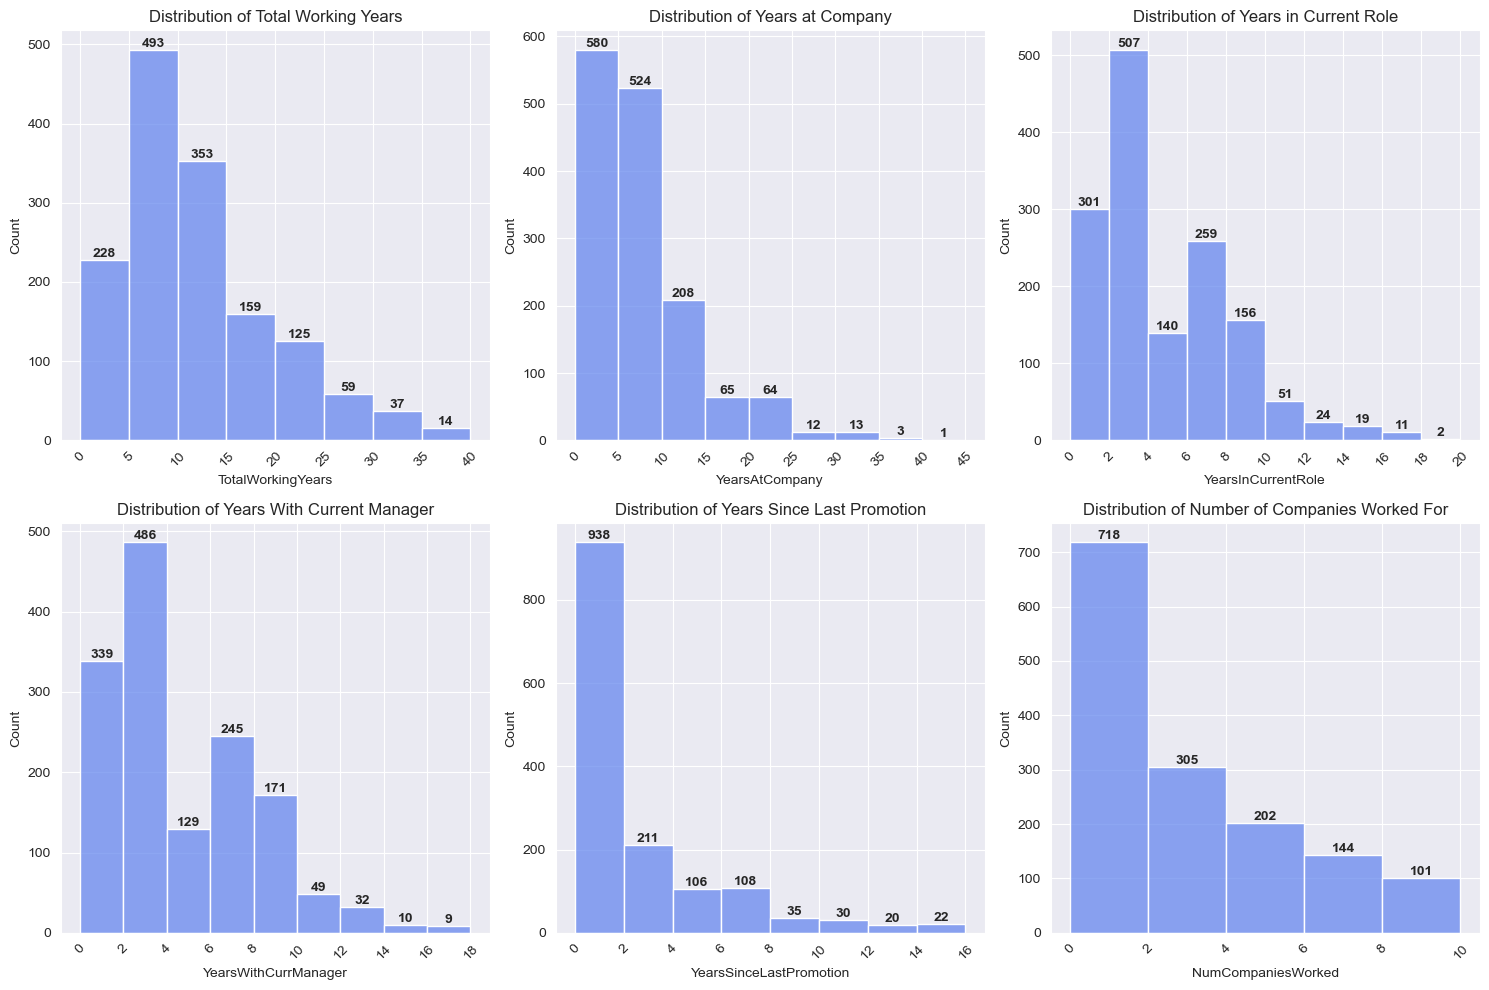

In [11]:
subplot_data = [
    {'data': hr_df['TotalWorkingYears'], 'bins': [0, 5, 10, 15, 20, 25, 30, 35, 40], 'title': 'Distribution of Total Working Years'},
    {'data': hr_df['YearsAtCompany'], 'bins': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'title': 'Distribution of Years at Company'},
    {'data': hr_df['YearsInCurrentRole'], 'bins': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'title': 'Distribution of Years in Current Role'},
    {'data': hr_df['YearsWithCurrManager'], 'bins': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18], 'title': 'Distribution of Years With Current Manager'},
    {'data': hr_df['YearsSinceLastPromotion'], 'bins': [0, 2, 4, 6, 8, 10, 12, 14, 16], 'title': 'Distribution of Years Since Last Promotion'},
    {'data': hr_df['NumCompaniesWorked'], 'bins': [0, 2, 4, 6, 8, 10], 'title': 'Distribution of Number of Companies Worked For'},
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, subplot in enumerate(subplot_data):
    data = subplot['data']
    bins = subplot['bins']
    title = subplot['title']

    ax = sns.histplot(data=data, bins=bins, ax=axes[i])
    for j in range(len(bins) - 1):
        bin_edge = bins[j]
        count = (data >= bin_edge) & (data < bins[j + 1])
        count_text = str(count.sum())
        ax.annotate(f'{count_text}', xy=(bin_edge + (bins[1] - bins[0]) / 2, max(ax.patches[j].get_height(), 0)),
                    ha='center', va='bottom', fontweight='bold')

    ax.set_title(title)
    ax.set_xticks(bins)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


### Correlation 

In [12]:
included = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TravelBinary', 'OTBinary', 'AttritionBinary']
subset_df = hr_df[included]

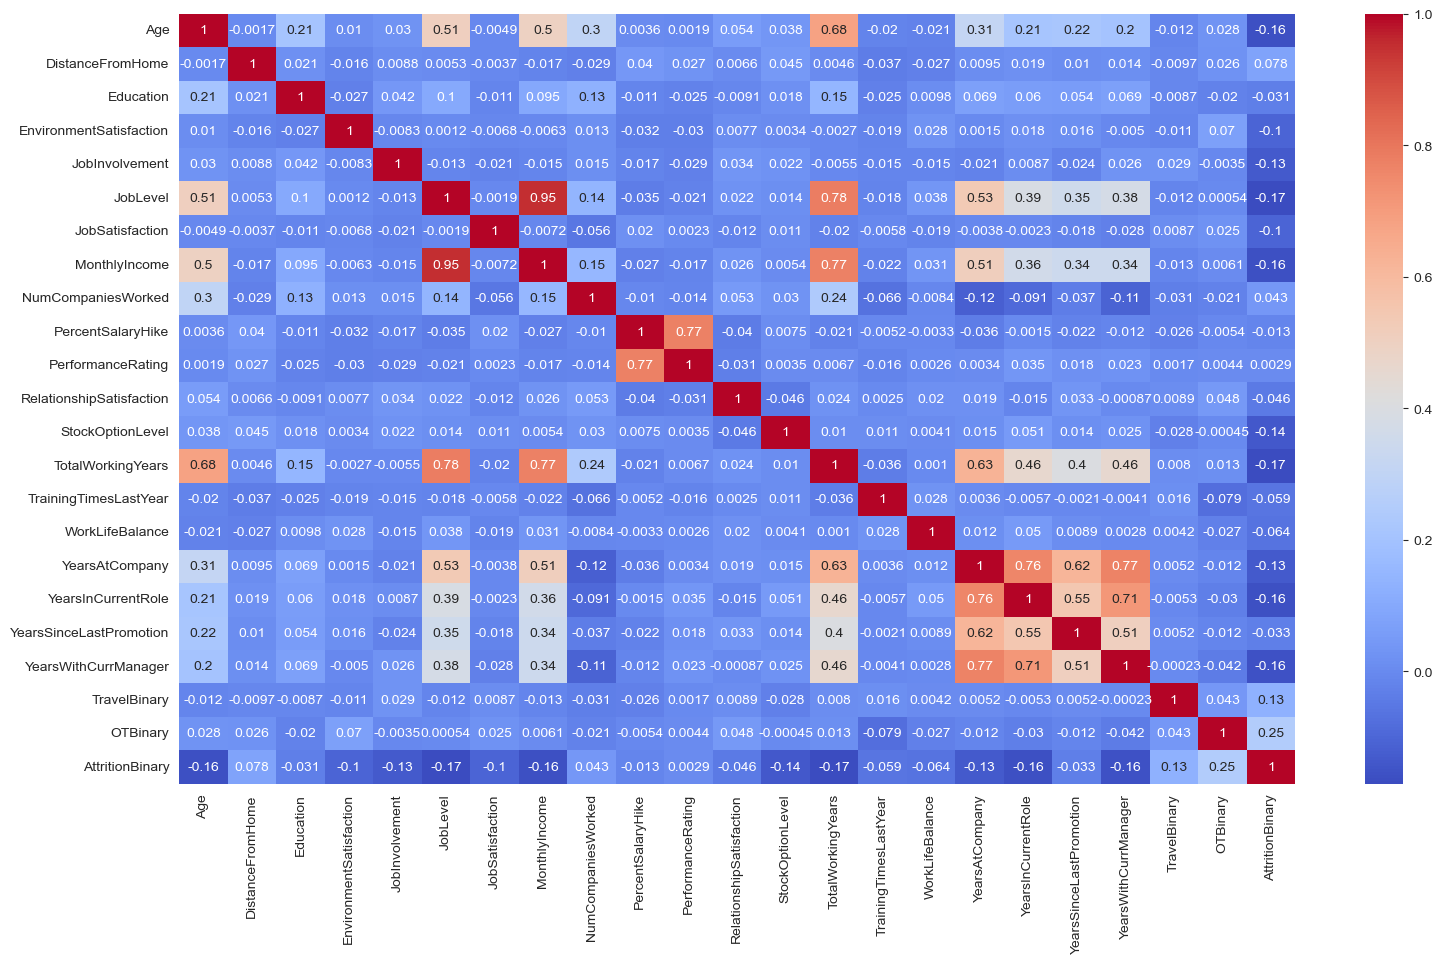

In [13]:
plt.figure(figsize=(18,10))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm')
plt.show()

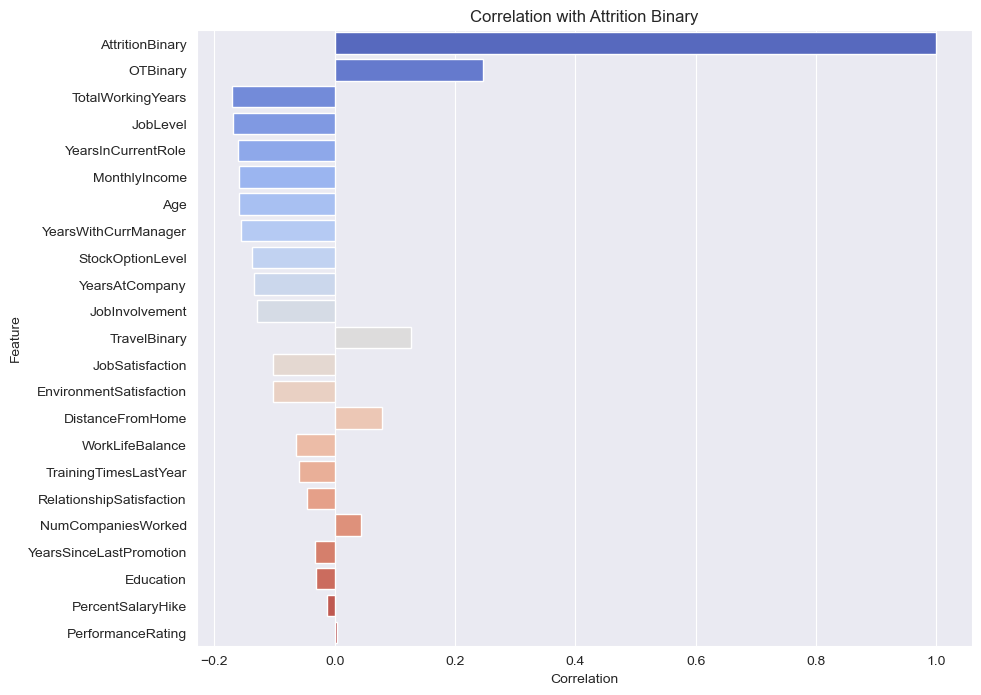

AttritionBinary             1.000000
OTBinary                    0.246118
TravelBinary                0.127006
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
PerformanceRating           0.002889
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: AttritionBinary, dtype: float64

In [14]:
#Correlation of variables relating to attrition 
correlation_data = subset_df.corr()['AttritionBinary'].sort_values(ascending=False)
corr_df = pd.DataFrame(correlation_data).reset_index()
corr_df.columns = ['Feature', 'Correlation']
corr_df['AbsCorrelation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='AbsCorrelation', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation', y='Feature', data=corr_df, palette='coolwarm', orient='h')
plt.title('Correlation with Attrition Binary')
plt.show()

#Sorted Variables in Correlation to Attrition
corr_matrix = subset_df.corr()
corr_matrix['AttritionBinary'].sort_values(ascending=False)

### Regression Modeling 

In [16]:
independent_var = subset_df.loc[:, "Age":"OTBinary"]
dependent_var =subset_df["AttritionBinary"]
independent_var = sm.add_constant(independent_var)
regression_model = sm.OLS(dependent_var, independent_var).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        AttritionBinary   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     17.84
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           9.72e-61
Time:                        13:00:49   Log-Likelihood:                -438.92
No. Observations:                1470   AIC:                             923.8
Df Residuals:                    1447   BIC:                             1046.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7770      0.117      6.637      0.000       0.547       1.007
Age                         -0.0041      0.001     -3.024      0.003      -0.007      -0.001
DistanceFromHome             0.0036      0.001      3.420      0.001       0.002       0.006
Education                    0.0011      0.009      0.133      0.894      -0.016       0.018
EnvironmentSatisfaction     -0.0404      0.008     -5.121      0.000      -0.056      -0.025
JobInvolvement              -0.0648      0.012     -5.339      0.000      -0.089      -0.041
JobLevel                    -0.0167      0.026     -0.646      0.518      -0.068       0.034
JobSatisfaction             -0.0370      0.008     -4.731      0.000      -0.052      -0.022
MonthlyIncome             -1.85e-06   5.98e-06     -0.309      0.757   -1.36e-05    9.89e-06
NumCompaniesWorked           0.0166      0.004      4.303      0.000       0.009       0.024
PercentSalaryHike           -0.0031      0.004     -0.842      0.400      -0.010       0.004
PerformanceRating            0.0195      0.038      0.517      0.605      -0.054       0.093
RelationshipSatisfaction    -0.0221      0.008     -2.758      0.006      -0.038      -0.006
StockOptionLevel            -0.0554      0.010     -5.471      0.000      -0.075      -0.036
TotalWorkingYears           -0.0042      0.002     -1.743      0.082      -0.009       0.001
TrainingTimesLastYear       -0.0116      0.007     -1.728      0.084      -0.025       0.002
WorkLifeBalance             -0.0253      0.012     -2.071      0.039      -0.049      -0.001
YearsAtCompany               0.0057      0.003      1.905      0.057      -0.000       0.012
YearsInCurrentRole          -0.0105      0.004     -2.683      0.007      -0.018      -0.003
YearsSinceLastPromotion      0.0119      0.003      3.444      0.001       0.005       0.019
YearsWithCurrManager        -0.0100      0.004     -2.502      0.012      -0.018      -0.002
TravelBinary                 0.0815      0.016      5.032      0.000       0.050       0.113
OTBinary                     0.2040      0.019     10.589      0.000       0.166       0.242
==============================================================================
Omnibus:                      300.496   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.316
Skew:                           1.341   Prob(JB):                    2.53e-111
Kurtosis:                       4.061   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong mult

Text(0.5, 1.0, 'Regression Coefficients in Relation to Attrition')

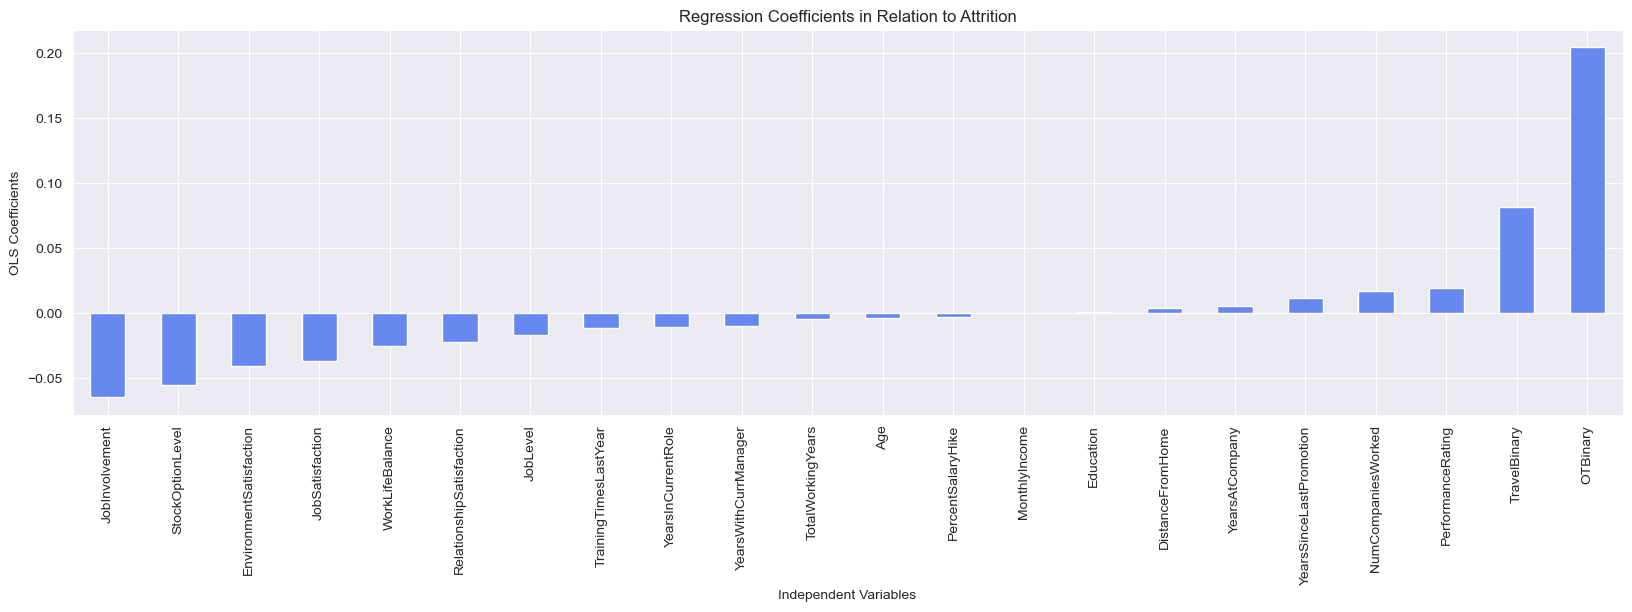

In [20]:
coefficients = regression_model.params[1:].sort_values()
coefficients.plot(kind='bar')
plt.xlabel('Independent Variables')
plt.ylabel('OLS Coefficients')
plt.title('Regression Coefficients in Relation to Attrition')

# Intrinsic Factors Relating to Attrition

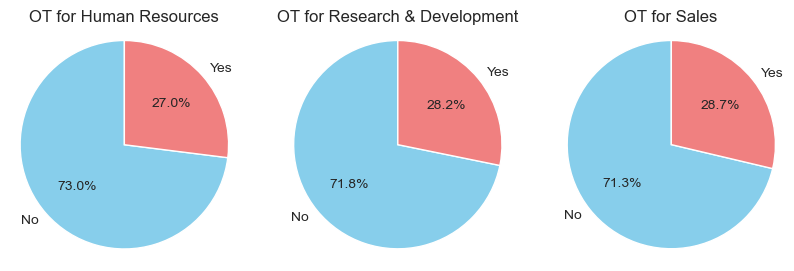

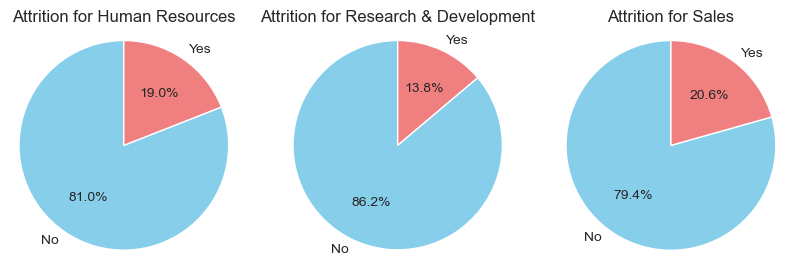

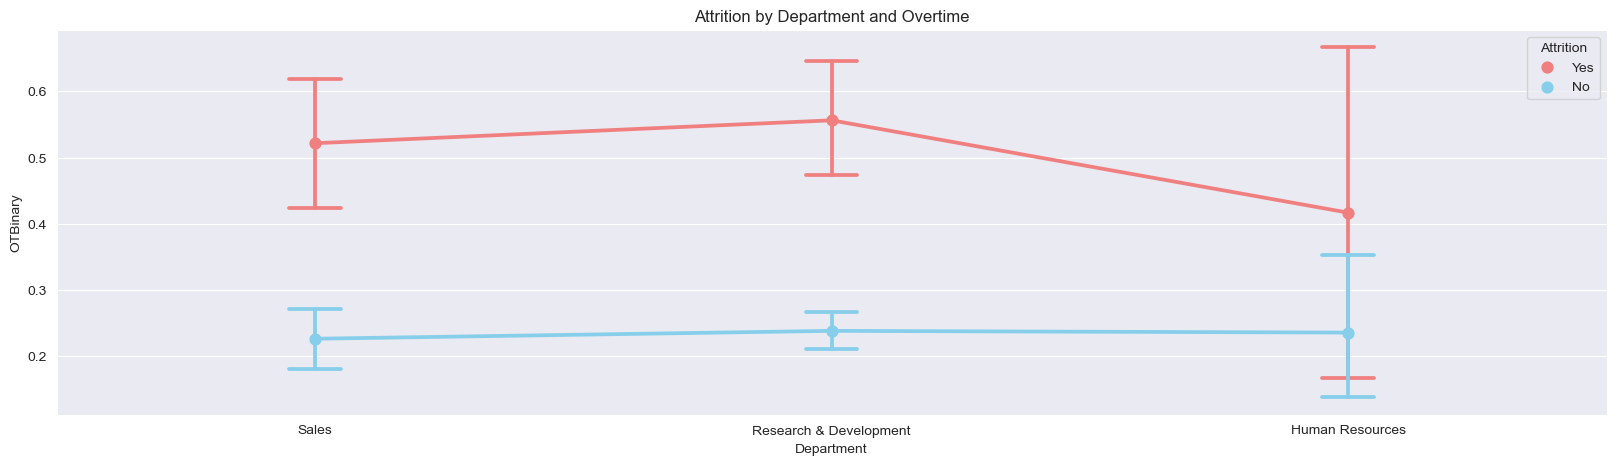

In [15]:
ot_by_dept = hr_df.groupby('Department')['OverTime'].value_counts(normalize=True).unstack()
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for ax, dept in zip(axes, ot_by_dept.index):
    labels = ot_by_dept.columns
    sizes = ot_by_dept.loc[dept]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'OT for {dept}')
plt.show()

attrition_by_dept = hr_df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for ax, dept in zip(axes, ot_by_dept.index):
    labels = attrition_by_dept.columns
    sizes = attrition_by_dept.loc[dept]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Attrition for {dept}')
plt.show()

sns.pointplot(x='Department', y='OTBinary', data=hr_df, hue='Attrition', capsize=0.1, palette=hue_colors)
plt.title('Attrition by Department and Overtime')
plt.show()

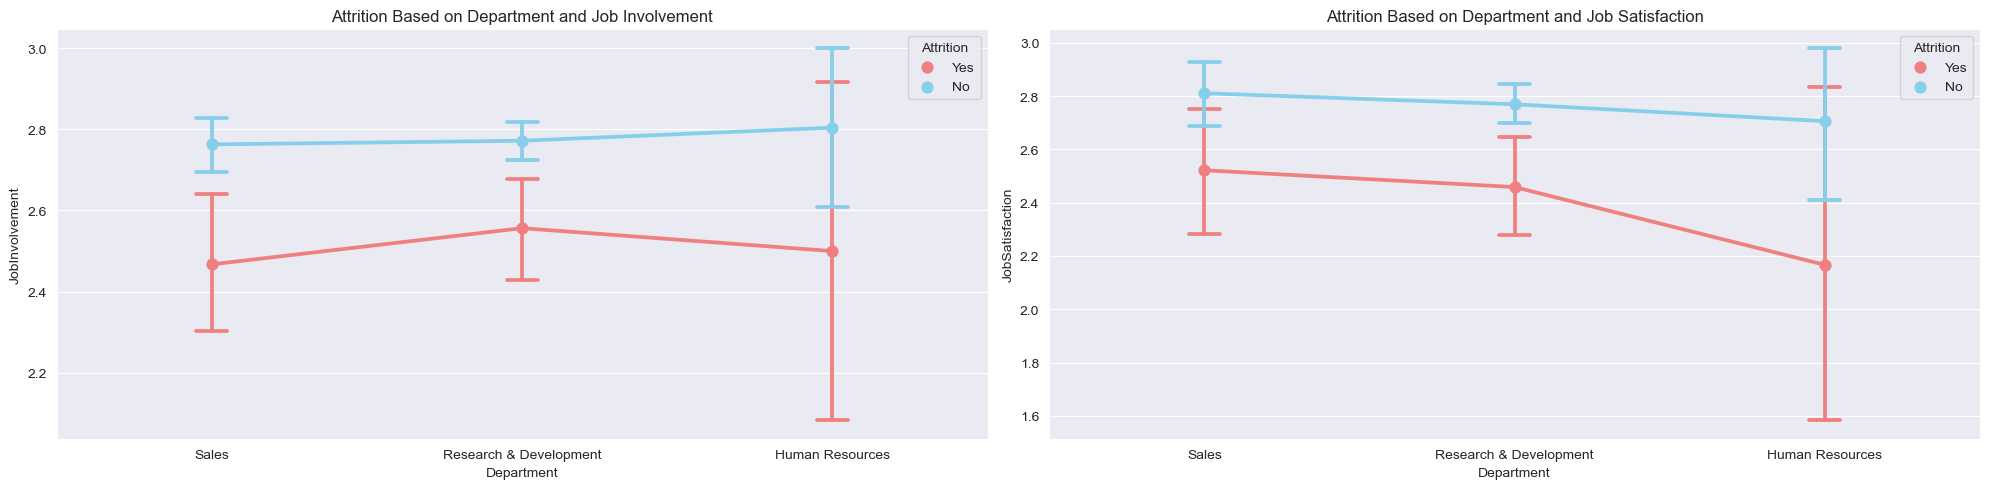

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# How attrition relates to job involvement by department
sns.pointplot(x='Department', y='JobInvolvement', data=hr_df, hue='Attrition', capsize=0.1, palette=hue_colors, ax=axes[0])
axes[0].set_title('Attrition Based on Department and Job Involvement')

# How attrition relates to job satisfaction by department
sns.pointplot(x='Department', y='JobSatisfaction', data=hr_df, hue='Attrition', capsize=0.1, palette=hue_colors, ax=axes[1])
axes[1].set_title('Attrition Based on Department and Job Satisfaction')

plt.tight_layout()
plt.show()

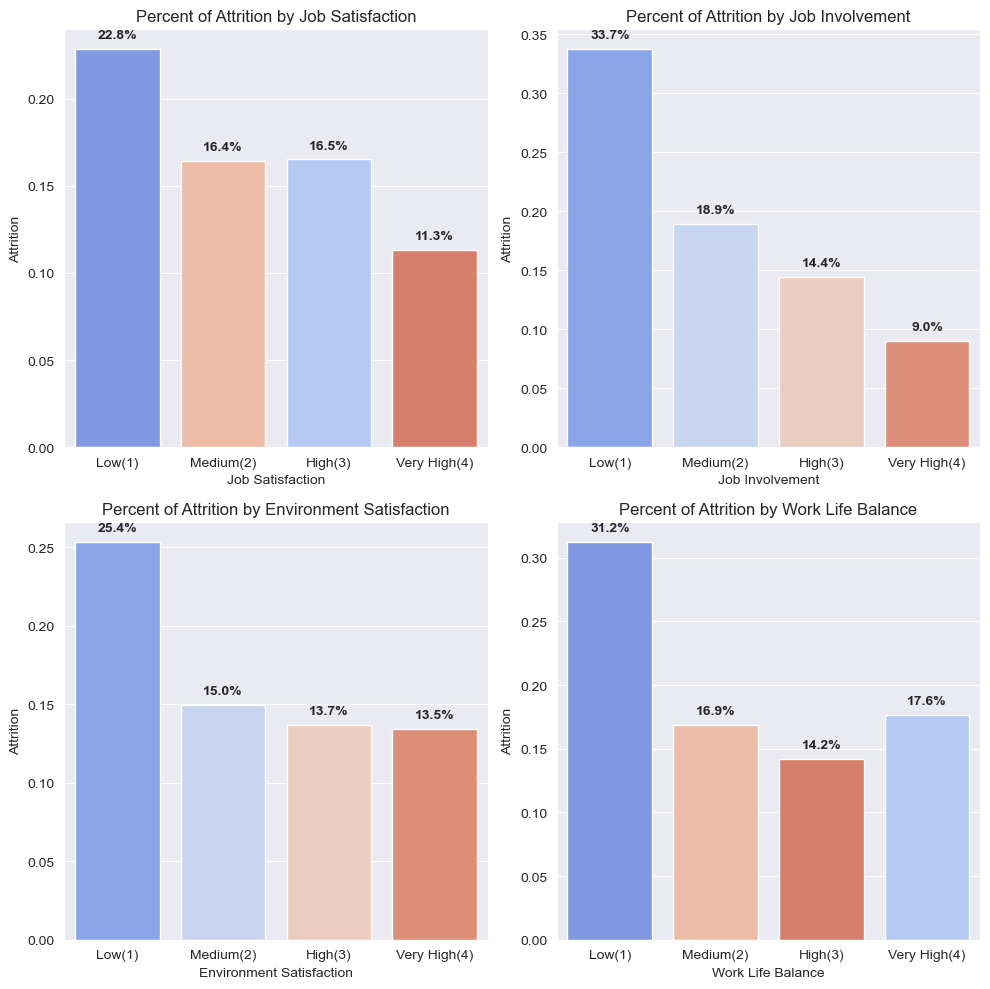

In [101]:
#Subplots of Percent of Attrition with Business Travel and Overtime
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot 1: Percent of Attrition by Job Satisfaction 
custom_hues = [
    (0.4358148063058824, 0.5707073031529412, 0.951717381282353),
    (0.968203399, 0.7208441, 0.6122929913333334),
    (0.6672529243333334, 0.7791764569999999, 0.992959213), 
    (0.9057834780117647, 0.4551856921647059, 0.35533588384705883),
]

AttritionBySatisfaction = hr_df.groupby('JobSatisfaction')['AttritionBinary'].mean().reset_index()
cmap = sns.color_palette("coolwarm", as_cmap=True)
hue_palette = dict(zip(AttritionBySatisfaction['JobSatisfaction'].unique(), custom_hues))
ax1 = sns.barplot(x='JobSatisfaction', y='AttritionBinary', data=AttritionBySatisfaction, ax=axes[0,0], palette=hue_palette)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
ax1.set_title('Percent of Attrition by Job Satisfaction')
ax1.set_xlabel('Job Satisfaction')
ax1.set_ylabel('Attrition')
ax1.set_xticklabels(['Low(1)', 'Medium(2)', 'High(3)', 'Very High(4)'])

# Plot 2: Percent of Attrition by Job Involvement
AttritionByInvolvement = hr_df.groupby('JobInvolvement')['AttritionBinary'].mean().reset_index()
order_involve = AttritionByInvolvement.sort_values(by='AttritionBinary', ascending=False)['JobInvolvement']
ax2 = sns.barplot(x='JobInvolvement', y='AttritionBinary', data=AttritionByInvolvement, order=order_involve, palette='coolwarm', ax=axes[0,1])
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
ax2.set_title('Percent of Attrition by Job Involvement')
ax2.set_xlabel('Job Involvement')
ax2.set_ylabel('Attrition')
ax2.set_xticklabels(['Low(1)', 'Medium(2)', 'High(3)', 'Very High(4)'])

# Plot 3: Percent of Attrition by Environment Satisfaction 
AttritionByEnvironment = hr_df.groupby('EnvironmentSatisfaction')['AttritionBinary'].mean().reset_index()
order_environment = AttritionByEnvironment.sort_values(by='AttritionBinary', ascending=False)['EnvironmentSatisfaction']
ax3 = sns.barplot(x='EnvironmentSatisfaction', y='AttritionBinary', data=AttritionByEnvironment, order=order_environment, palette='coolwarm', ax=axes[1,0])
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
ax3.set_title('Percent of Attrition by Environment Satisfaction')
ax3.set_xlabel('Environment Satisfaction')
ax3.set_ylabel('Attrition')
ax3.set_xticklabels(['Low(1)', 'Medium(2)', 'High(3)', 'Very High(4)'])

# Plot 4: Percent of Attrition by Work Life Balance
custom_hues = [
    (0.4358148063058824, 0.5707073031529412, 0.951717381282353),
    (0.968203399, 0.7208441, 0.6122929913333334),
    (0.9057834780117647, 0.4551856921647059, 0.35533588384705883),
    (0.6672529243333334, 0.7791764569999999, 0.992959213),
]
AttritionByBalance = hr_df.groupby('WorkLifeBalance')['AttritionBinary'].mean().reset_index()
cmap = sns.color_palette("coolwarm", as_cmap=True)
hue_palette = dict(zip(AttritionByBalance['WorkLifeBalance'].unique(), custom_hues))
ax4 = sns.barplot(x='WorkLifeBalance', y='AttritionBinary', data=AttritionByBalance, palette=hue_palette, ax=axes[1,1])
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
ax4.set_title('Percent of Attrition by Work Life Balance')
ax4.set_xlabel('Work Life Balance')
ax4.set_ylabel('Attrition')
ax4.set_xticklabels(['Low(1)', 'Medium(2)', 'High(3)', 'Very High(4)'])

plt.tight_layout()
plt.show()

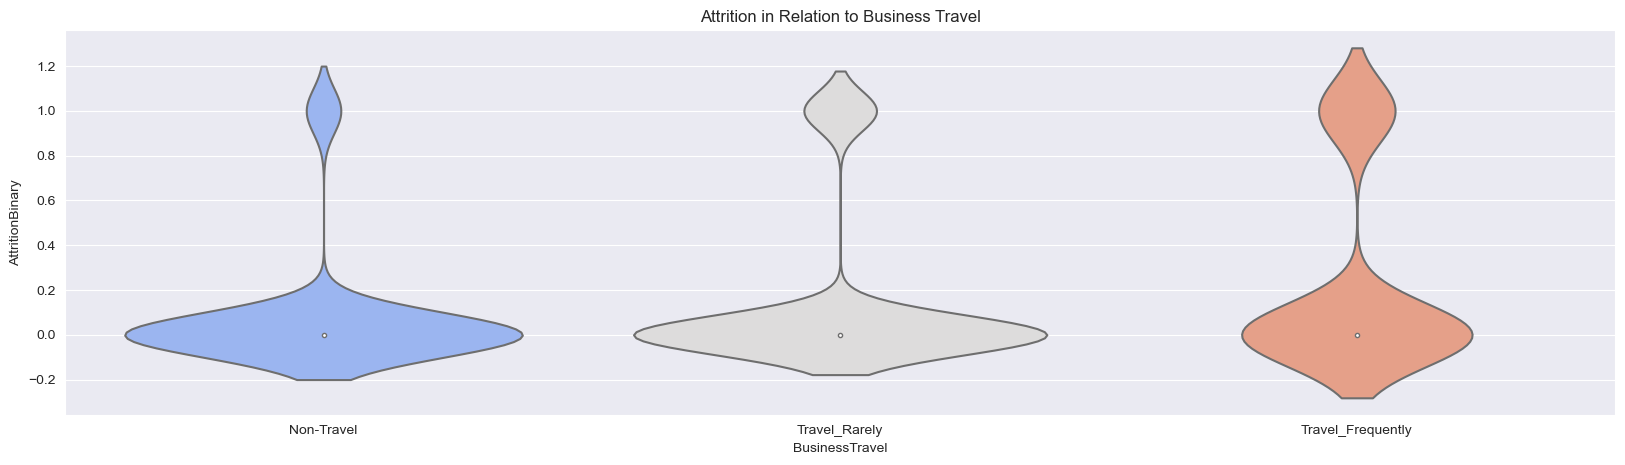

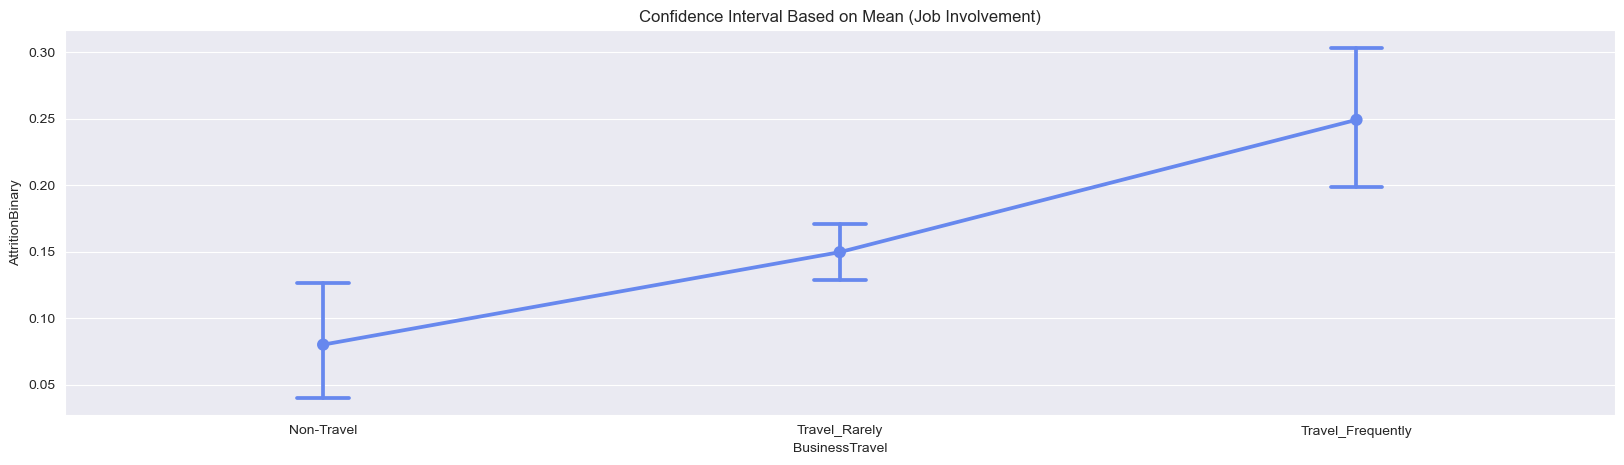

In [77]:
#Attrition with Business Travel 

sns.violinplot(x='BusinessTravel', y='AttritionBinary', data=hr_df, order=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], palette='coolwarm')
plt.title('Attrition in Relation to Business Travel')
plt.show()

sns.pointplot(x='BusinessTravel', y='AttritionBinary', data=hr_df, capsize=0.1, order=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'])
plt.title('Confidence Interval Based on Mean (Job Involvement)')
plt.show()



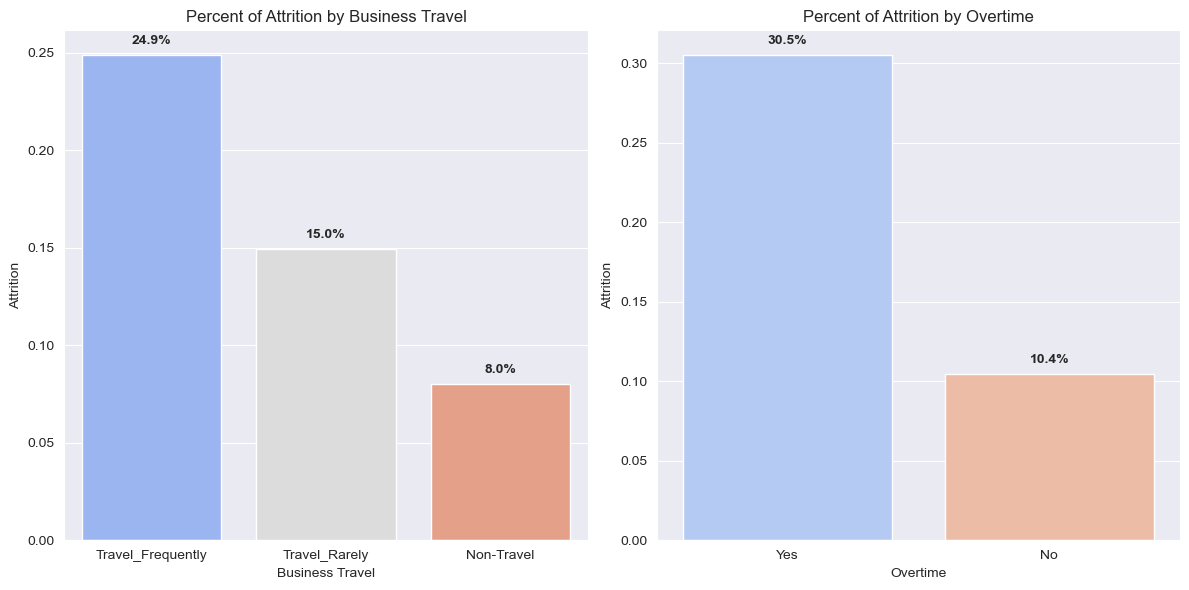

In [95]:
#Subplots of Percent of Attrition with Business Travel and Overtime
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 1: Percent of Attrition by Business Travel 
AttritionByTravel = hr_df.groupby('BusinessTravel')['AttritionBinary'].mean().reset_index()
order_travel = ['Travel_Frequently', 'Travel_Rarely', 'Non-Travel']
ax1 = sns.barplot(x='BusinessTravel', y='AttritionBinary', data=AttritionByTravel, order=order_travel, ax=axes[0], palette='coolwarm')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
ax1.set_title('Percent of Attrition by Business Travel')
ax1.set_xlabel('Business Travel')
ax1.set_ylabel('Attrition')

# Plot 2: Percent of Attrition by Overtime
AttritionByOT = hr_df.groupby('OverTime')['AttritionBinary'].mean().reset_index()
order_ot = ['Yes', 'No']
ax2 = sns.barplot(x='OverTime', y='AttritionBinary', data=AttritionByOT, order=order_ot, palette='coolwarm', ax=axes[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
ax2.set_title('Percent of Attrition by Overtime')
ax2.set_xlabel('Overtime')
ax2.set_ylabel('Attrition')

plt.tight_layout()
plt.show()

# Extrinsic Factors Relating to Attrition

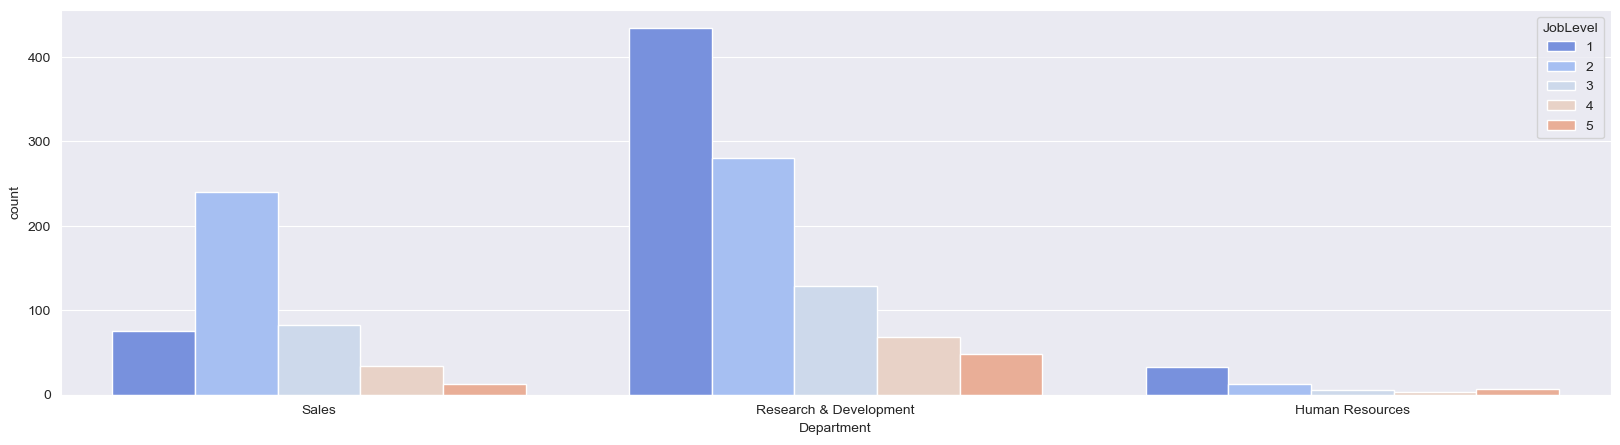

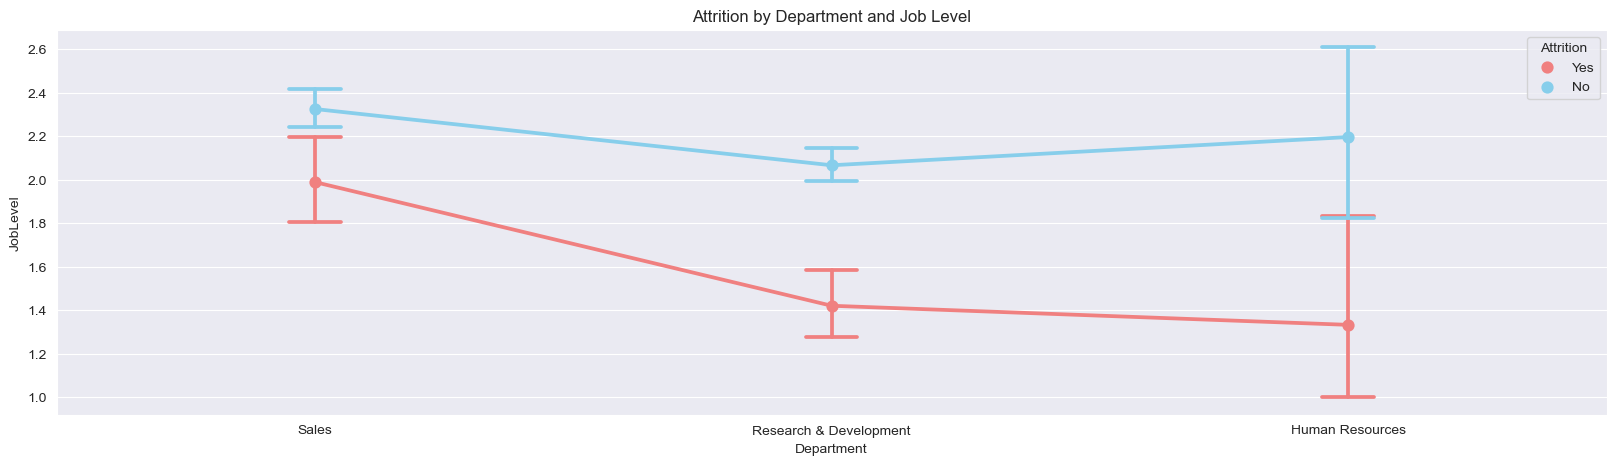

In [56]:
sns.countplot(x='Department', hue='JobLevel', data=hr_df)
plt.show()


sns.pointplot(x='Department', y='JobLevel', data=hr_df, hue='Attrition', capsize=0.1, palette=hue_colors)
plt.title('Attrition by Department and Job Level')
plt.show()


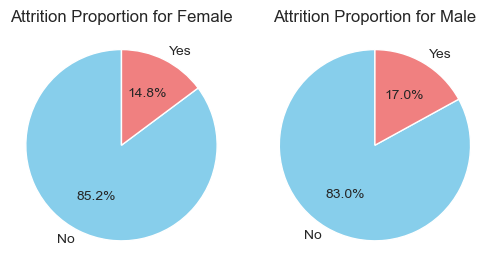

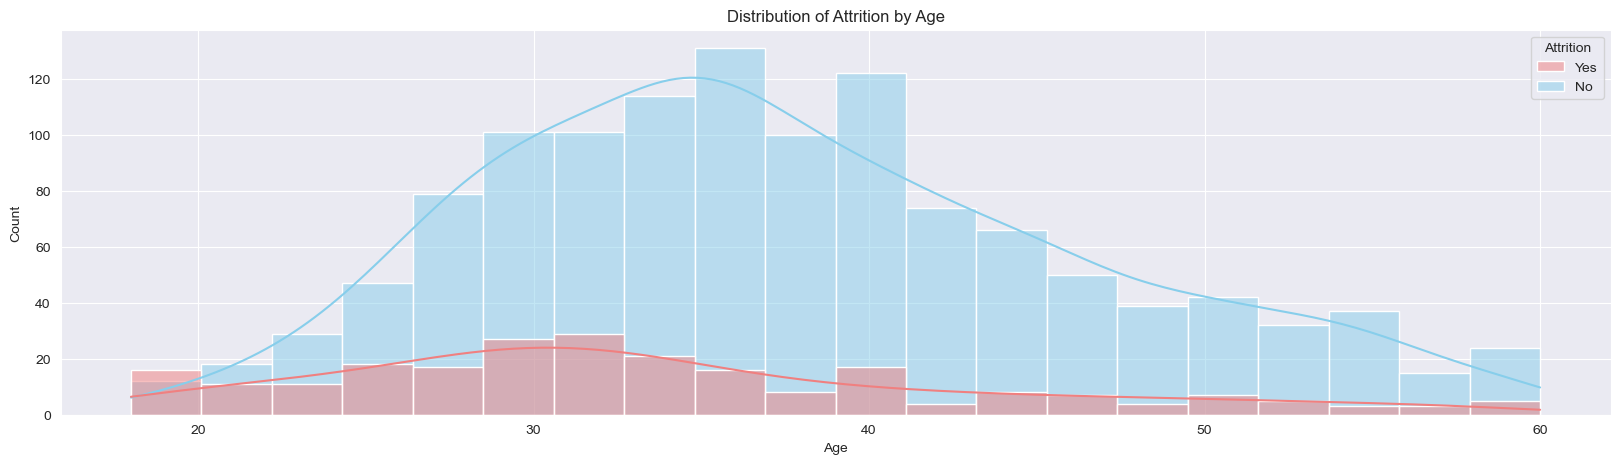

In [67]:
#attrition by gender

attrition_by_gender = hr_df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for ax, gender in zip(axes, attrition_by_gender.index):
    labels = attrition_by_gender.columns
    sizes = attrition_by_gender.loc[gender]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(f'Attrition Proportion for {gender}')
plt.show()

#attrition by age 

sns.histplot(data=hr_df, x='Age', hue='Attrition', kde=True, bins=20, palette=hue_colors)
plt.title('Distribution of Attrition by Age')
plt.show()

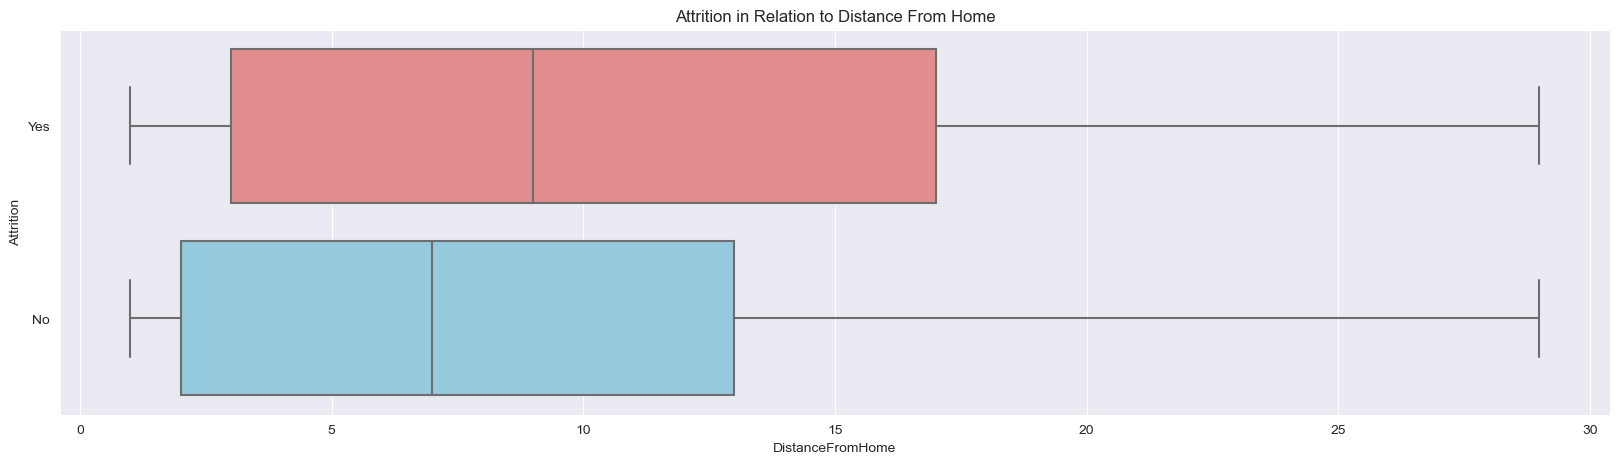

In [84]:
#Attrition with Distance from Home 

sns.boxplot(y='Attrition', x='DistanceFromHome', data=hr_df, palette = hue_colors)
plt.title('Attrition in Relation to Distance From Home')
plt.show()

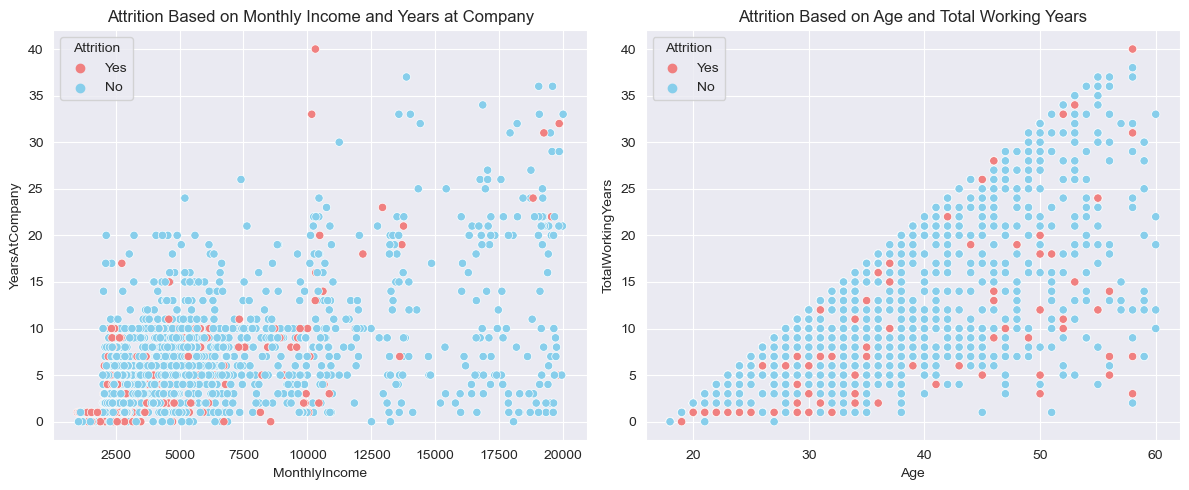

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for Monthly Income vs. Years at Company
sns.scatterplot(x='MonthlyIncome', y='YearsAtCompany', data=hr_df, hue='Attrition', palette=hue_colors, ax=axes[0])
axes[0].set_title('Attrition Based on Monthly Income and Years at Company')

# Scatter plot for Age vs. Total Working Years
sns.scatterplot(x='Age', y='TotalWorkingYears', data=hr_df, hue='Attrition', palette=hue_colors, ax=axes[1])
axes[1].set_title('Attrition Based on Age and Total Working Years')

plt.tight_layout()
plt.show()

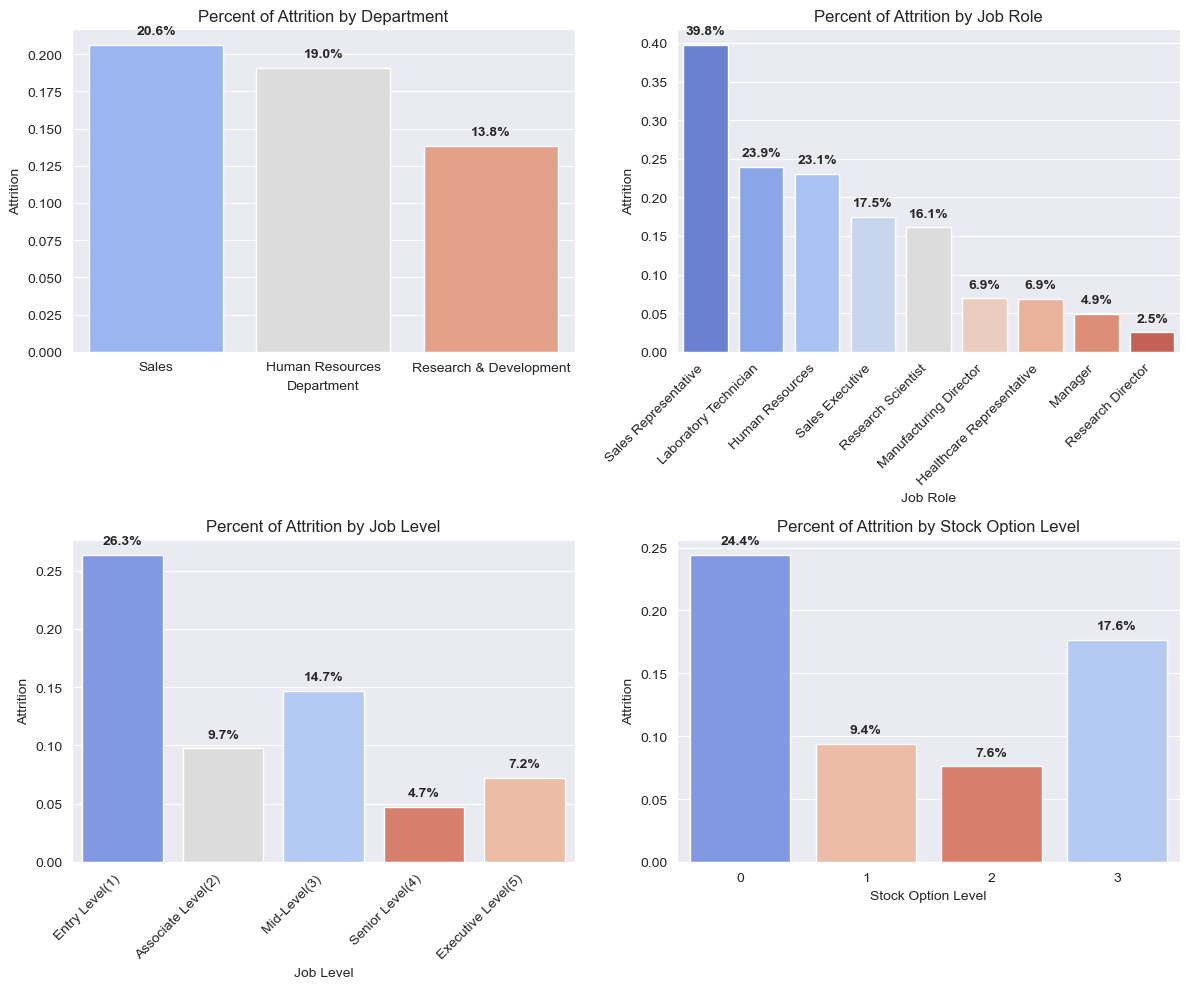

In [94]:
#Subplots of Percent of Attrition with Department, Job Role, Job Level, and Stock Option Level 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Percent of Attrition by Department
AttritionByDept = hr_df.groupby('Department')['AttritionBinary'].mean().reset_index()
order_dept = AttritionByDept.sort_values(by='AttritionBinary', ascending=False)['Department']
ax1 = sns.barplot(x='Department', y='AttritionBinary', data=AttritionByDept, order=order_dept, ax=axes[0, 0], palette='coolwarm')
ax1.set_title('Percent of Attrition by Department')
ax1.set_xlabel('Department')
ax1.set_ylabel('Attrition')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')

# Plot 2: Percent of Attrition by Job Role
AttritionByRole = hr_df.groupby('JobRole')['AttritionBinary'].mean().reset_index()
order_role = AttritionByRole.sort_values(by='AttritionBinary', ascending=False)['JobRole']
ax2 = sns.barplot(x='JobRole', y='AttritionBinary', data=AttritionByRole, order=order_role, ax=axes[0, 1], palette='coolwarm')
ax2.set_title('Percent of Attrition by Job Role')
ax2.set_xlabel('Job Role')
ax2.set_ylabel('Attrition')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')

# Plot 3: Percent of Attrition by Job Level

custom_hues = [
    (0.4358148063058824, 0.5707073031529412, 0.951717381282353),
    (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
    (0.6672529243333334, 0.7791764569999999, 0.992959213),
    (0.9057834780117647, 0.4551856921647059, 0.35533588384705883),
    (0.968203399, 0.7208441, 0.6122929913333334)
]
AttritionByJobLevel = hr_df.groupby('JobLevel')['AttritionBinary'].mean().reset_index()
cmap = sns.color_palette("coolwarm", as_cmap=True)
hue_palette = dict(zip(AttritionByJobLevel['JobLevel'].unique(), custom_hues))
ax3 = sns.barplot(x='JobLevel', y='AttritionBinary', data=AttritionByJobLevel, ax=axes[1, 0], palette=hue_palette)
ax3.set_title('Percent of Attrition by Job Level')
ax3.set_xlabel('Job Level')
ax3.set_ylabel('Attrition')
ax3.set_xticklabels(['Entry Level(1)', 'Associate Level(2)', 'Mid-Level(3)', 'Senior Level(4)', 'Executive Level(5)'], rotation=45, ha='right')
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')

# plot 4: Percent of Attrition by Stock Option Level 
custom_hues2 = [
    (0.4358148063058824, 0.5707073031529412, 0.951717381282353),
    (0.968203399, 0.7208441, 0.6122929913333334),
    (0.9057834780117647, 0.4551856921647059, 0.35533588384705883),
    (0.6672529243333334, 0.7791764569999999, 0.992959213)
]

AttritionByStock = hr_df.groupby('StockOptionLevel')['AttritionBinary'].mean().reset_index()
cmap = sns.color_palette("coolwarm", as_cmap=True)
hue_palette2 = dict(zip(AttritionByStock['StockOptionLevel'].unique(), custom_hues2))
ax4 = sns.barplot(x='StockOptionLevel', y='AttritionBinary', data=AttritionByStock, ax=axes[1,1], palette=hue_palette2)
ax4.set_title('Percent of Attrition by Stock Option Level')
ax4.set_xlabel('Stock Option Level')
ax4.set_ylabel('Attrition')
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights 